# C관리도

- target의 chip 수의 평균이 CL
- UCL : CL+ 3*루트(CL)
- LCL = CL - 3*루트(CL)
- 라인은 불량칩으로 
- 벗어난 개수
- 벗어난 개수/count

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from datetime import datetime

matplotlib.rc('font', family = 'Noto Sans CJK JP')
matplotlib.rc('axes', unicode_minus = False)
plt.style.use(['fivethirtyeight'])
import seaborn as sns



from scipy import stats
import scipy.stats
from scipy.stats import shapiro
from scipy.stats import bartlett, levene
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import rmse

from sklearn.tree import export_graphviz

import graphviz
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from IPython.core.display import display, HTML
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering,KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from dask.diagnostics import ProgressBar
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, f1_score, roc_curve, auc, precision_score,recall_score


display(HTML("<style>.container { width:100% !important; }</style>"))

In [30]:
df = pd.read_csv('final_merged_dataset.csv')

In [31]:
df

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,...,Furance_Temp,RTA_Temp,count_ion,Target,Error_message,Wafer_map,chamber_total_count,chamber_path,defective,defective_chip_rate
0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,...,854.0,154,582,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2907,21111,0,0.0705
1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,...,895.0,156,542,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2819,21122,0,0.0275
2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,...,898.0,152,550,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2847,21133,0,0.0480
3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,...,879.0,155,582,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,2907,21111,0,0.0525
4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,...,882.0,155,542,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,2819,21122,0,0.0395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,NOLSM3081211,1,Oxidation,dry,1160.350439,O2,34.56,0.199,18,710.197,...,883.0,153,582,105,none,[[0 0 0 0 0 0 0 0 0 0 1 2 2 1 1 1 0 0 0 0 0 0 ...,2902,13311,0,0.0525
1654,NOLSM8493212,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,...,867.0,152,550,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,2878,11133,0,0.0210
1655,NOLSM8503213,1,Oxidation,wet,1279.160563,H2O,45.12,0.214,21,712.946,...,868.0,152,542,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...,2821,11222,0,0.0210
1656,NOLSM8513214,1,Oxidation,wet,1272.804948,H2O,45.34,0.213,20,711.987,...,868.0,152,582,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...,2938,11311,0,0.0120


In [61]:
df.chamber_path.unique()

array([21111, 21122, 21133, 21222, 21233, 21211, 21311, 21322, 21333,
       22111, 22222, 22333, 23133, 23222, 23311, 22122, 22133, 22211,
       22233, 22311, 22322, 23111, 23333, 23122, 23211, 23233, 23322,
       33311, 31111, 31333, 32133, 32222, 32311, 33111, 33222, 33333,
       31133, 31222, 31311, 32111, 33133, 31122, 31211, 31233, 31322,
       32122, 32211, 32233, 32322, 32333, 33122, 33211, 33233, 33322,
       11111, 11222, 11333, 12133, 12222, 12311, 13111, 11311, 12111,
       12333, 13222, 13333, 11133, 13133, 13311, 11122, 11211, 11233,
       11322, 12122, 12211, 12233, 12322, 13122, 13211, 13233, 13322])

In [62]:
Instability_df = pd.DataFrame(columns = ['path', 'CL', 'UCL', 'LCL', 'count', 'error_ratio'])

In [63]:
Instability_df

,path,CL,UCL,LCL,count,error_ratio


In [64]:
CL_list = []
UCL_list = []
LCL_list = []
count_list = []
ratio_list = []

for i in df.chamber_path.unique():
    temp = df[df['chamber_path'] == i][['No_Die', 'Target', 'chamber_path']].reset_index(drop=True)
    temp_CL = temp.Target.mean()
    CL_list.append(temp_CL)
    temp_UCL = temp_CL + 3*np.sqrt(temp_CL)
    UCL_list.append(temp_UCL)
    temp_LCL = temp_CL - 3*np.sqrt(temp_CL)
    LCL_list.append(temp_LCL)
    count_error = len(temp[(temp.Target > temp_UCL) | (temp.Target < temp_LCL)])
    count_list.append(count_error)23222
    temp_ratio = count_error/len(temp)
    ratio_list.append(temp_ratio)

In [ ]:
temp_CL = temp.Target.mean()
temp_UCL = temp_CL + 3*np.sqrt(temp_CL)
temp_LCL = temp_CL - 3*np.sqrt(temp_CL)

In [65]:
Instability_df['path'] = df.chamber_path.unique()
Instability_df['CL'] = CL_list
Instability_df['UCL'] = UCL_list
Instability_df['LCL'] = LCL_list
Instability_df['count'] = count_list
Instability_df['error_ratio'] = ratio_list

In [66]:
Instability_df

,path,CL,UCL,LCL,count,error_ratio
0,21111,112.862069,144.733037,80.991101,13,0.448276
1,21122,96.250000,125.682125,66.817875,8,0.666667
2,21133,101.888889,132.170897,71.606881,13,0.481481
3,21222,107.609756,138.730293,76.489219,20,0.487805
4,21233,92.454545,121.300531,63.608559,7,0.636364
...,...,...,...,...,...,...
76,12322,108.250000,139.462978,77.037022,7,0.583333
77,13122,122.833333,156.082393,89.584273,3,0.250000
78,13211,75.000000,100.980762,49.019238,4,0.333333
79,13233,90.636364,119.197303,62.075424,9,0.818182


# 1) count로 정렬

In [98]:
Instability_df.sort_values(by = 'count').head(5)

,path,CL,UCL,LCL,count,error_ratio
45,32122,80.777778,107.740715,53.814840,2,0.222222
48,32322,106.750000,137.745967,75.754033,2,0.250000
53,33322,66.777778,91.293079,42.262476,3,0.333333
5,21211,65.900000,90.253644,41.546356,3,0.300000
20,22322,87.625000,115.707468,59.542532,3,0.375000


In [69]:
Instability_df.sort_values(by = 'count').tail(5)

,path,CL,UCL,LCL,count,error_ratio
13,23222,109.116279,140.453900,77.778658,18,0.418605
31,32222,110.904762,142.498161,79.311363,20,0.476190
3,21222,107.609756,138.730293,76.489219,20,0.487805
64,13222,100.119048,130.136899,70.101196,20,0.476190
10,22222,109.488372,140.879380,78.097365,26,0.604651


In [72]:
Instability_path_list = Instability_df.sort_values(by = 'count').head(5)['path']
stability_path_list = Instability_df.sort_values(by = 'count').tail(5)['path']

# 안정한 공정

In [174]:
Instability_df.sort_values(by = 'count').head(5)

,path,CL,UCL,LCL,count,error_ratio
45,32122,80.777778,107.740715,53.814840,2,0.222222
48,32322,106.750000,137.745967,75.754033,2,0.250000
53,33322,66.777778,91.293079,42.262476,3,0.333333
5,21211,65.900000,90.253644,41.546356,3,0.300000
20,22322,87.625000,115.707468,59.542532,3,0.375000


In [175]:
Instability_path_list = Instability_df.sort_values(by = 'count').head(5)['path'];Instability_path_list

45    32122
48    32322
53    33322
5     21211
20    22322
Name: path, dtype: int64

In [176]:
temp = df[df['chamber_path'] == 32122].reset_index(drop=True)

In [177]:
temp_CL = temp.Target.mean()
temp_UCL = temp_CL + 3*np.sqrt(temp_CL)
temp_LCL = temp_CL - 3*np.sqrt(temp_CL)

display(temp_CL)
display(temp_UCL)
display(temp_LCL)

80.77777777777777

107.7407153032033

53.81484025235225

## path_32122

In [178]:
temp = df[df['chamber_path'] == 32122].reset_index(drop=True)
temp_CL = temp.Target.mean()
temp_UCL = temp_CL + 3*np.sqrt(temp_CL)
temp_LCL = temp_CL - 3*np.sqrt(temp_CL)
outlier_index = temp[(temp.Target > temp_UCL) | (temp.Target < temp_LCL)].index

temp.loc[outlier_index, 'Target']

1    50
7    53
Name: Target, dtype: int64

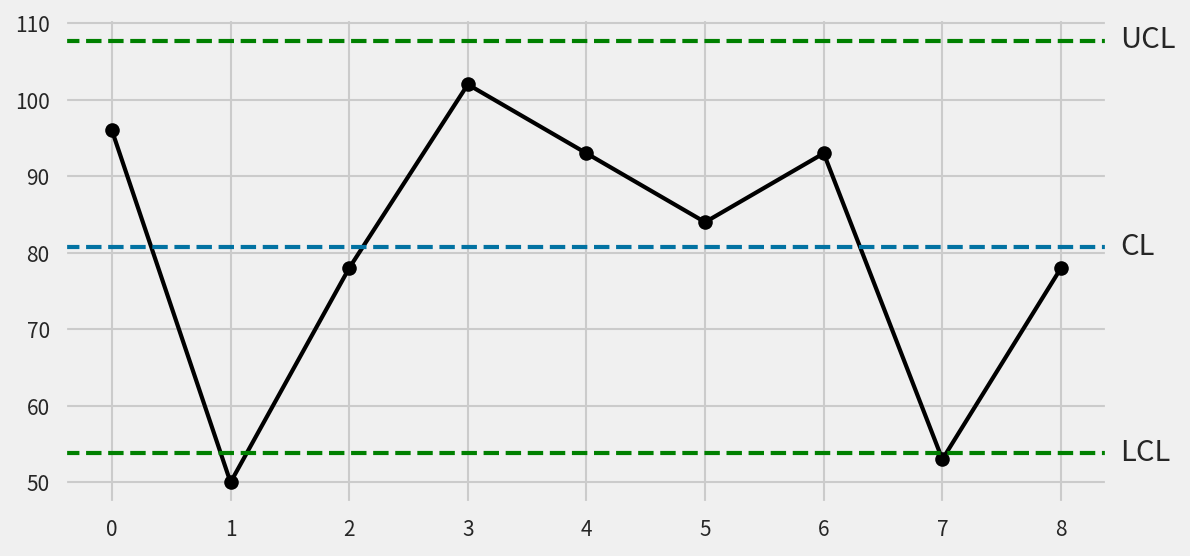

In [179]:
plt.figure(dpi=150, figsize=(8,4))
plt.plot(temp['Target'], color='black', linewidth = 2, marker='o')
plt.axhline(y=temp_CL, color='b', linewidth=2,  linestyle='--')
plt.text(8.5,temp_CL-1, 'CL')
plt.axhline(y=temp_UCL, color='green', linewidth=2,  linestyle='--')
plt.text(8.5, temp_UCL-1, 'UCL')
plt.axhline(y=temp_LCL, color='green', linewidth=2,  linestyle='--')
plt.text(8.5, temp_LCL-1, 'LCL')
plt.show()

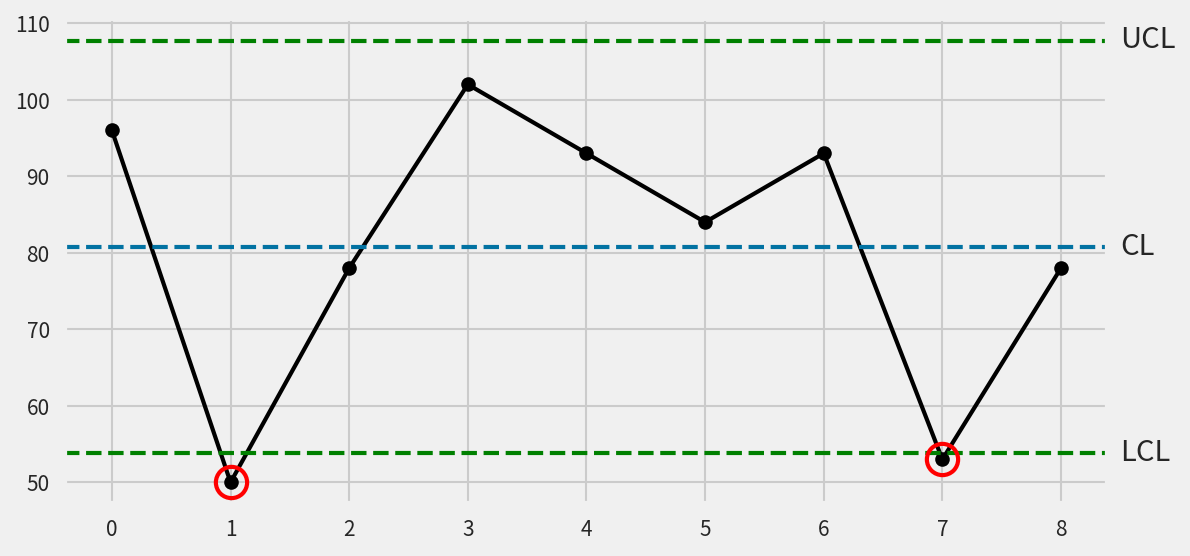

In [180]:
temp = df[df['chamber_path'] == 32122].reset_index(drop=True)
temp_CL = temp.Target.mean()
temp_UCL = temp_CL + 3*np.sqrt(temp_CL)
temp_LCL = temp_CL - 3*np.sqrt(temp_CL)
plt.figure(dpi=150, figsize=(8,4))
plt.plot(temp['Target'], color='black', linewidth = 2, marker='o')
plt.axhline(y=temp_CL, color='b', linewidth=2,  linestyle='--')
plt.text(8.5,temp_CL-1, 'CL')
plt.axhline(y=temp_UCL, color='green', linewidth=2,  linestyle='--')
plt.text(8.5, temp_UCL-1, 'UCL')
plt.axhline(y=temp_LCL, color='green', linewidth=2,  linestyle='--')
plt.text(8.5, temp_LCL-1, 'LCL')
plt.plot(temp.loc[outlier_index, 'Target'],'o', ms = 15, mec = 'red', mfc = 'none', mew = 2)
plt.show()

# 불안정한 공정

In [181]:
Instability_df.sort_values(by = 'count').tail(5)

,path,CL,UCL,LCL,count,error_ratio
13,23222,109.116279,140.453900,77.778658,18,0.418605
31,32222,110.904762,142.498161,79.311363,20,0.476190
3,21222,107.609756,138.730293,76.489219,20,0.487805
64,13222,100.119048,130.136899,70.101196,20,0.476190
10,22222,109.488372,140.879380,78.097365,26,0.604651


In [182]:
Instability_path_list = Instability_df.sort_values(by = 'count').tail(5)['path'];Instability_path_list

13    23222
31    32222
3     21222
64    13222
10    22222
Name: path, dtype: int64

In [183]:
texttemp = df[df['chamber_path'] == 22222].reset_index(drop=True)
temp_CL = temp.Target.mean()
temp_UCL = temp_CL + 3*np.sqrt(temp_CL)
temp_LCL = temp_CL - 3*np.sqrt(temp_CL)

display(temp_CL)
display(temp_UCL)
display(temp_LCL)

80.77777777777777

107.7407153032033

53.81484025235225

In [184]:
temp = df[df['chamber_path'] == 22222].reset_index(drop=True)

In [185]:
temp
temp_CL = temp.Target.mean()
temp_UCL = temp_CL + 3*np.sqrt(temp_CL)
temp_LCL = temp_CL - 3*np.sqrt(temp_CL)

temp
outlier_index = temp[(temp.Target > temp_UCL) | (temp.Target < temp_LCL)].index

temp.loc[outlier_index, 'Target']

2      53
4      65
6     234
7      50
9      57
10     24
11    156
13     63
15     75
16    201
17     75
18    270
19     75
21     35
22    150
23    235
24     39
26    200
27    300
31     66
34    145
35    142
37     69
38     18
40     78
41     24
Name: Target, dtype: int64

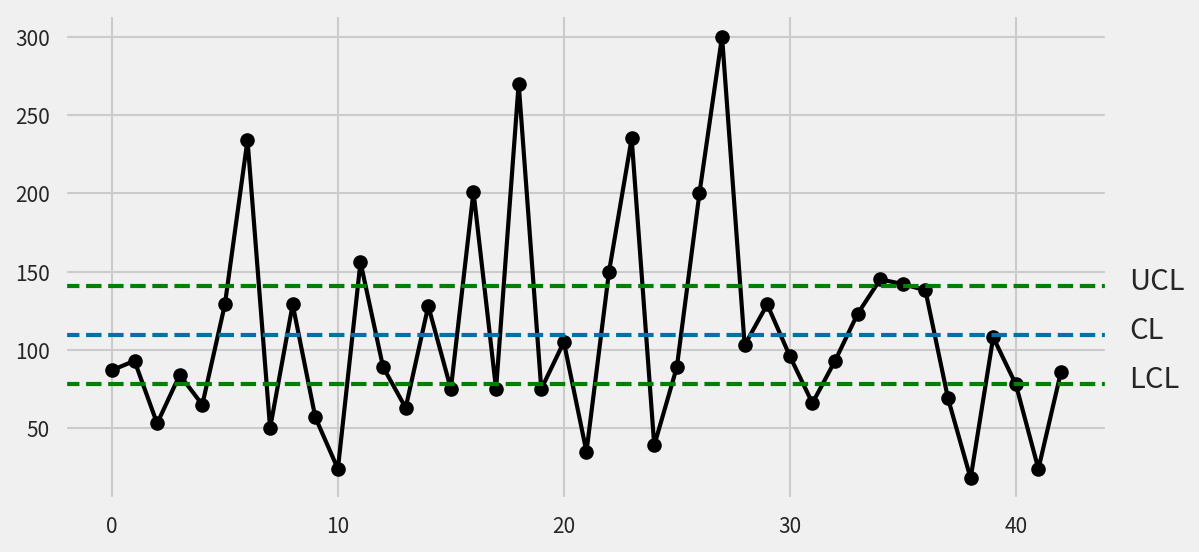

In [186]:
temp_CL = temp.Target.mean()
temp_UCL = temp_CL + 3*np.sqrt(temp_CL)
temp_LCL = temp_CL - 3*np.sqrt(temp_CL)
plt.figure(dpi=150, figsize=(8,4))
plt.plot(temp['Target'], color='black', linewidth = 2, marker='o')
plt.axhline(y=temp_CL, color='b', linewidth=2,  linestyle='--')
plt.text(len(temp)+2,temp_CL-2, 'CL')
plt.axhline(y=temp_UCL, color='green', linewidth=2,  linestyle='--')
plt.text(len(temp)+2, temp_UCL-2, 'UCL')
plt.axhline(y=temp_LCL, color='green', linewidth=2,  linestyle='--')
plt.text(len(temp)+2, temp_LCL-2, 'LCL')
plt.show()

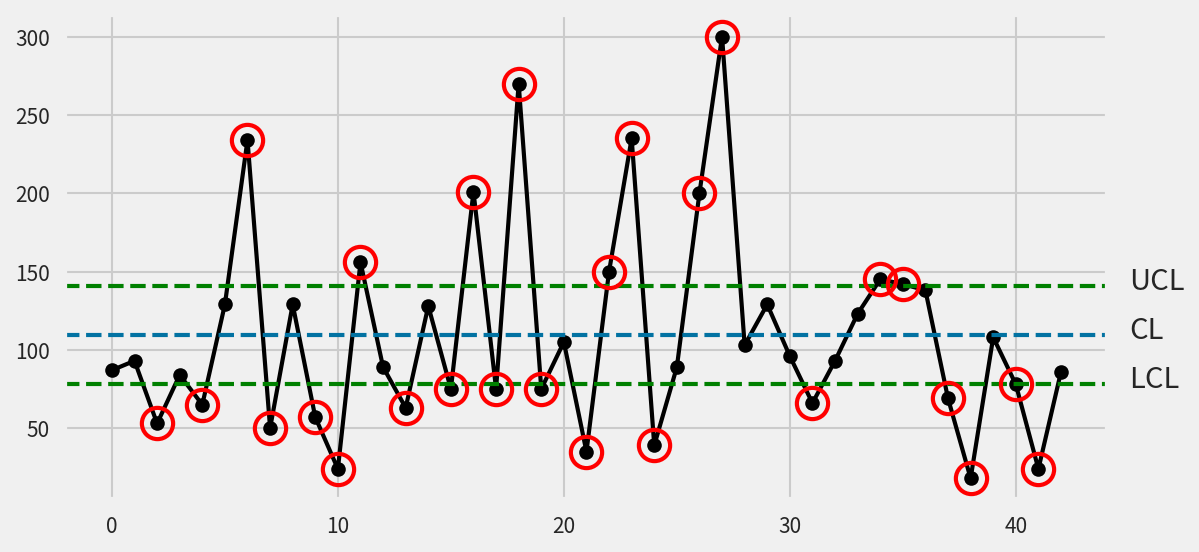

In [187]:
temp_CL = temp.Target.mean()
temp_UCL = temp_CL + 3*np.sqrt(temp_CL)
temp_LCL = temp_CL - 3*np.sqrt(temp_CL)
plt.figure(dpi=150, figsize=(8,4))
plt.plot(temp['Target'], color='black', linewidth = 2, marker='o')
plt.axhline(y=temp_CL, color='b', linewidth=2,  linestyle='--')
plt.text(len(temp)+2,temp_CL-2, 'CL')
plt.axhline(y=temp_UCL, color='green', linewidth=2,  linestyle='--')
plt.text(len(temp)+2, temp_UCL-2, 'UCL')
plt.axhline(y=temp_LCL, color='green', linewidth=2,  linestyle='--')
plt.text(len(temp)+2, temp_LCL-2, 'LCL')
plt.plot(temp.loc[outlier_index, 'Target'],'o', ms = 15, mec = 'red', mfc = 'none', mew = 2)
plt.show()

# 2) count로 정렬

In [188]:
Instability_df.sort_values(by = 'error_ratio').head(5)

,path,CL,UCL,LCL,count,error_ratio
45,32122,80.777778,107.740715,53.814840,2,0.222222
48,32322,106.750000,137.745967,75.754033,2,0.250000
77,13122,122.833333,156.082393,89.584273,3,0.250000
58,12222,121.218750,154.248566,88.188934,8,0.250000
34,33222,74.264706,100.117798,48.411614,10,0.294118


In [189]:
Instability_df.sort_values(by = 'error_ratio').tail(5)

,path,CL,UCL,LCL,count,error_ratio
80,13322,85.416667,113.143008,57.690325,9,0.750000
41,31122,141.555556,177.248692,105.862419,7,0.777778
79,13233,90.636364,119.197303,62.075424,9,0.818182
42,31211,166.000000,204.652296,127.347704,9,1.000000
43,31233,134.777778,169.605927,99.949628,9,1.000000


In [190]:
Instability_path_list = Instability_df.sort_values(by = 'error_ratio').head(5)['path']
stability_path_list = Instability_df.sort_values(by = 'error_ratio').tail(5)['path']

# 안정한 공정

In [191]:
Instability_df.sort_values(by = 'error_ratio').head(5)

,path,CL,UCL,LCL,count,error_ratio
45,32122,80.777778,107.740715,53.814840,2,0.222222
48,32322,106.750000,137.745967,75.754033,2,0.250000
77,13122,122.833333,156.082393,89.584273,3,0.250000
58,12222,121.218750,154.248566,88.188934,8,0.250000
34,33222,74.264706,100.117798,48.411614,10,0.294118


In [192]:
Instability_path_list = Instability_df.sort_values(by = 'error_ratio').head(5)['path'];Instability_path_list

45    32122
48    32322
77    13122
58    12222
34    33222
Name: path, dtype: int64

In [193]:
temp = df[df['chamber_path'] == 32122].reset_index(drop=True)

In [194]:
temp_CL = temp.Target.mean()
temp_UCL = temp_CL + 3*np.sqrt(temp_CL)
temp_LCL = temp_CL - 3*np.sqrt(temp_CL)

display(temp_CL)
display(temp_UCL)
display(temp_LCL)

80.77777777777777

107.7407153032033

53.81484025235225

## path_32122

In [195]:
temp = df[df['chamber_path'] == 32122].reset_index(drop=True)
temp_CL = temp.Target.mean()
temp_UCL = temp_CL + 3*np.sqrt(temp_CL)
temp_LCL = temp_CL - 3*np.sqrt(temp_CL)
outlier_index = temp[(temp.Target > temp_UCL) | (temp.Target < temp_LCL)].index

temp.loc[outlier_index, 'Target']

1    50
7    53
Name: Target, dtype: int64

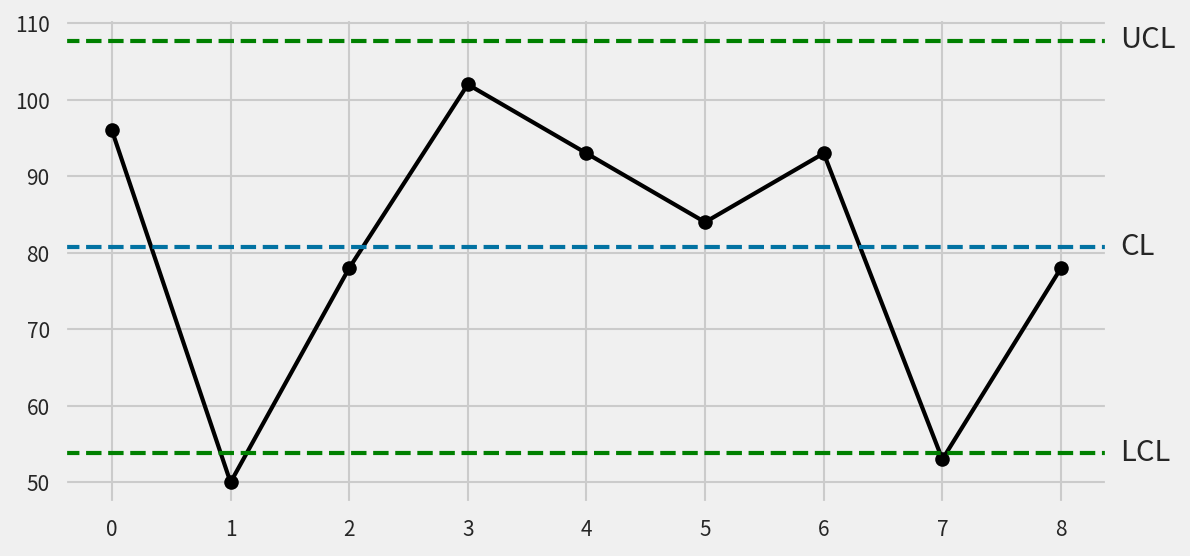

In [196]:
plt.figure(dpi=150, figsize=(8,4))
plt.plot(temp['Target'], color='black', linewidth = 2, marker='o')
plt.axhline(y=temp_CL, color='b', linewidth=2,  linestyle='--')
plt.text(8.5,temp_CL-1, 'CL')
plt.axhline(y=temp_UCL, color='green', linewidth=2,  linestyle='--')
plt.text(8.5, temp_UCL-1, 'UCL')
plt.axhline(y=temp_LCL, color='green', linewidth=2,  linestyle='--')
plt.text(8.5, temp_LCL-1, 'LCL')
plt.show()

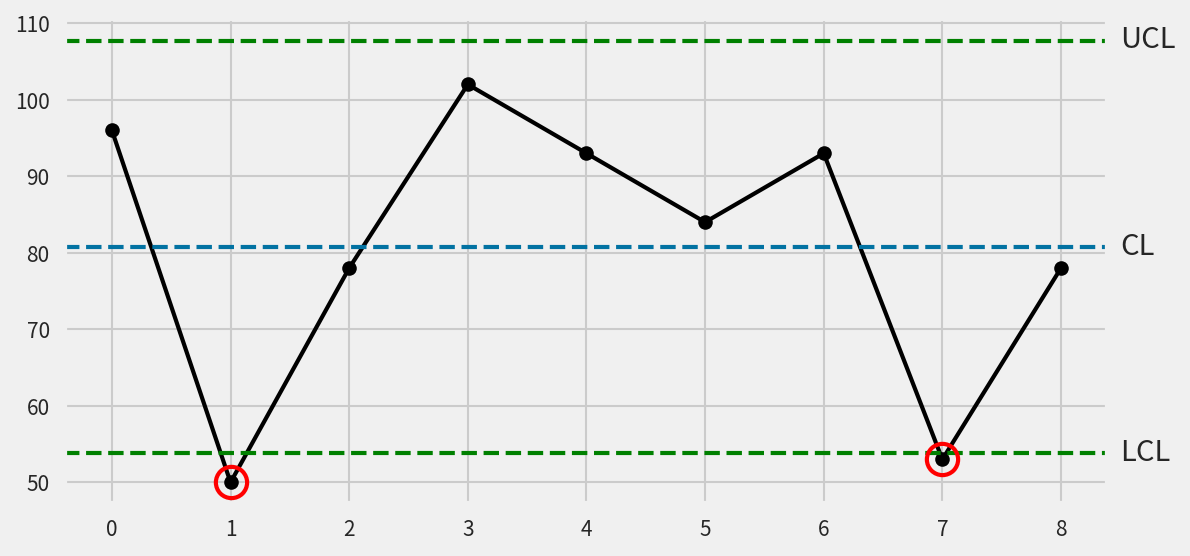

In [197]:
temp = df[df['chamber_path'] == 32122].reset_index(drop=True)
temp_CL = temp.Target.mean()
temp_UCL = temp_CL + 3*np.sqrt(temp_CL)
temp_LCL = temp_CL - 3*np.sqrt(temp_CL)
plt.figure(dpi=150, figsize=(8,4))
plt.plot(temp['Target'], color='black', linewidth = 2, marker='o')
plt.axhline(y=temp_CL, color='b', linewidth=2,  linestyle='--')
plt.text(8.5,temp_CL-1, 'CL')
plt.axhline(y=temp_UCL, color='green', linewidth=2,  linestyle='--')
plt.text(8.5, temp_UCL-1, 'UCL')
plt.axhline(y=temp_LCL, color='green', linewidth=2,  linestyle='--')
plt.text(8.5, temp_LCL-1, 'LCL')
plt.plot(temp.loc[outlier_index, 'Target'],'o', ms = 15, mec = 'red', mfc = 'none', mew = 2)
plt.show()

# 불안정한 공정

In [198]:
Instability_df.sort_values(by = 'error_ratio').tail(5)

,path,CL,UCL,LCL,count,error_ratio
80,13322,85.416667,113.143008,57.690325,9,0.750000
41,31122,141.555556,177.248692,105.862419,7,0.777778
79,13233,90.636364,119.197303,62.075424,9,0.818182
42,31211,166.000000,204.652296,127.347704,9,1.000000
43,31233,134.777778,169.605927,99.949628,9,1.000000


In [199]:
Instability_path_list = Instability_df.sort_values(by = 'error_ratio').tail(5)['path'];Instability_path_list

80    13322
41    31122
79    13233
42    31211
43    31233
Name: path, dtype: int64

In [202]:
temp = df[df['chamber_path'] == 31233].reset_index(drop=True)
temp_CL = temp.Target.mean()
temp_UCL = temp_CL + 3*np.sqrt(temp_CL)
temp_LCL = temp_CL - 3*np.sqrt(temp_CL)

display(temp_CL)
display(temp_UCL)
display(temp_LCL)

134.77777777777777

169.60592731231378

99.94962824324178

In [203]:
temp
temp_CL = temp.Target.mean()
temp_UCL = temp_CL + 3*np.sqrt(temp_CL)
temp_LCL = temp_CL - 3*np.sqrt(temp_CL)

temp
outlier_index = temp[(temp.Target > temp_UCL) | (temp.Target < temp_LCL)].index

temp.loc[outlier_index, 'Target']

0     97
1     54
2     48
3    228
4    204
5    198
6     92
7     92
8    200
Name: Target, dtype: int64

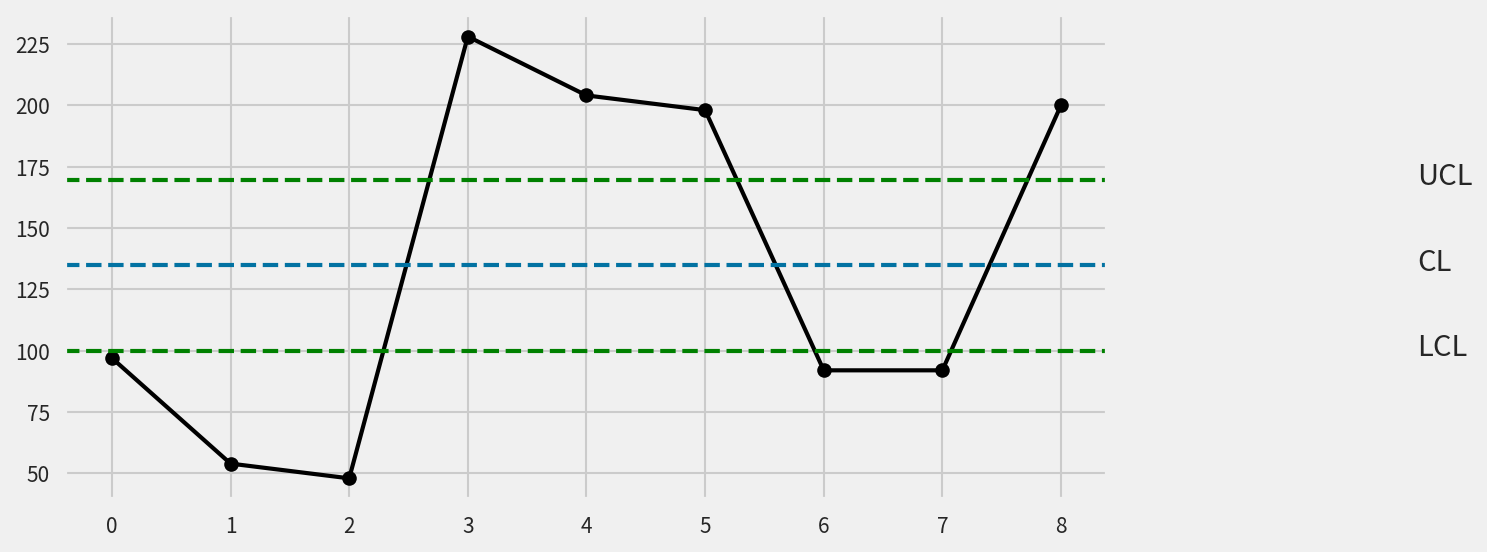

In [204]:
temp_CL = temp.Target.mean()
temp_UCL = temp_CL + 3*np.sqrt(temp_CL)
temp_LCL = temp_CL - 3*np.sqrt(temp_CL)
plt.figure(dpi=150, figsize=(8,4))
plt.plot(temp['Target'], color='black', linewidth = 2, marker='o')
plt.axhline(y=temp_CL, color='b', linewidth=2,  linestyle='--')
plt.text(len(temp)+2,temp_CL-2, 'CL')
plt.axhline(y=temp_UCL, color='green', linewidth=2,  linestyle='--')
plt.text(len(temp)+2, temp_UCL-2, 'UCL')
plt.axhline(y=temp_LCL, color='green', linewidth=2,  linestyle='--')
plt.text(len(temp)+2, temp_LCL-2, 'LCL')
plt.show()

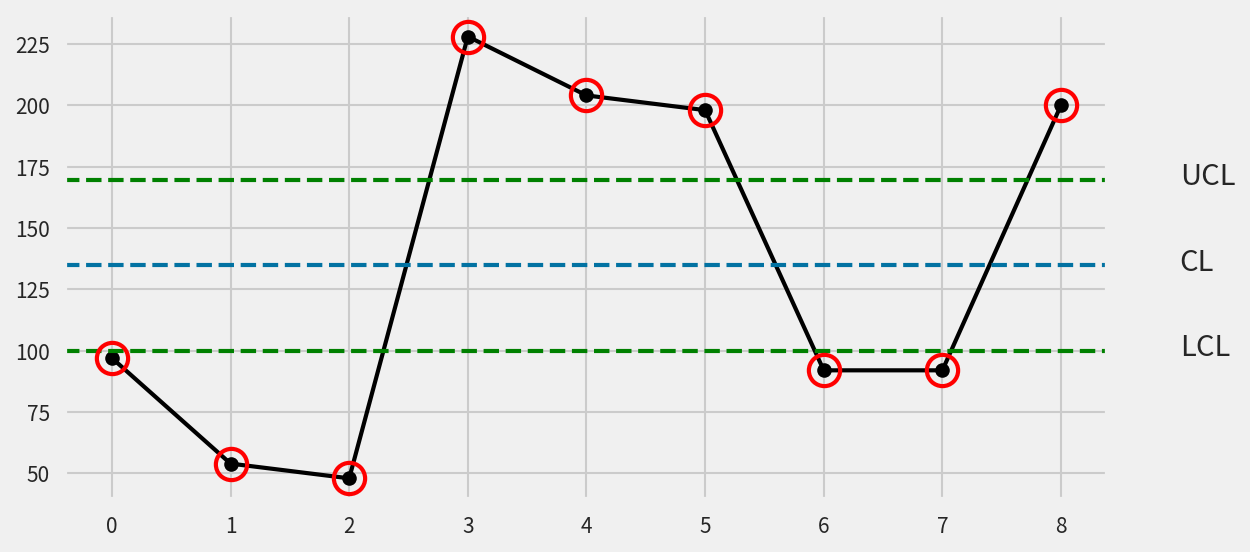

In [214]:
temp_CL = temp.Target.mean()
temp_UCL = temp_CL + 3*np.sqrt(temp_CL)
temp_LCL = temp_CL - 3*np.sqrt(temp_CL)
plt.figure(dpi=150, figsize=(8,4))
plt.plot(temp['Target'], color='black', linewidth = 2, marker='o')
plt.axhline(y=temp_CL, color='b', linewidth=2,  linestyle='--')
plt.text(len(temp),temp_CL-2, 'CL')
plt.axhline(y=temp_UCL, color='green', linewidth=2,  linestyle='--')
plt.text(len(temp), temp_UCL-2, 'UCL')
plt.axhline(y=temp_LCL, color='green', linewidth=2,  linestyle='--')
plt.text(len(temp), temp_LCL-2, 'LCL')
plt.plot(temp.loc[outlier_index, 'Target'],'o', ms = 15, mec = 'red', mfc = 'none', mew = 2)
plt.show()